In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
""" import mysql.connector as sql """
import os
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import RFECV,RFE
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from ast import literal_eval

In [5]:
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv') 

In [6]:
""" movies.head(1) """

' movies.head(1) '

In [7]:
""" movies.shape """

' movies.shape '

In [8]:
""" credits.head() """

' credits.head() '

In [9]:

movies = movies.merge(credits,on='title')
list(movies.columns)


['budget',
 'genres',
 'homepage',
 'id',
 'keywords',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'vote_average',
 'vote_count',
 'movie_id',
 'cast',
 'crew']

In [10]:

def convert(text):
    L = []
    for i in literal_eval(text):
        L.append(i['name']) 
    return L 


In [11]:
""" movies.head()"""
# budget
# homepage
# id
# original_language
# original_title
# popularity
# production_company
# production_countries
# release-date(not sure)
movies2=movies[['title','genres','budget','vote_count','vote_average','runtime']]
movies2['genres'] = movies2['genres'].apply(convert)
""" movies2['production_companies']=movies2['production_companies'].apply(convert) """
movies2.head()


C:\Users\Man\AppData\Local\Temp\ipykernel_33920\919864889.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies2['genres'] = movies2['genres'].apply(convert)


,title,genres,budget,vote_count,vote_average,runtime
0,Avatar,"[Action, Adventure, Fantasy, Science Fiction]",237000000,11800,7.2,162.0
1,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]",300000000,4500,6.9,169.0
2,Spectre,"[Action, Adventure, Crime]",245000000,4466,6.3,148.0
3,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]",250000000,9106,7.6,165.0
4,John Carter,"[Action, Adventure, Science Fiction]",260000000,2124,6.1,132.0


In [12]:
def genreassign(lst,dataname):
    count=0
    genre=['Action','Adventure', 'Fantasy', 'Science Fiction','Crime','Drama','Thriller','Romance','Family','Horror']
    for i in lst:
        for j in i:
            if j in genre:
                dataname.at[count,j]=1
        count+=1
    return None

In [13]:
genre=['Action','Adventure', 'Fantasy', 'Science Fiction','Crime','Drama','Thriller','Romance','Family','Horror']
for i in range(len(genre)):
    movies2[genre[i]]=0
genreassign(movies2['genres'],movies2)
movies2.head()


C:\Users\Man\AppData\Local\Temp\ipykernel_33920\3589310361.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies2[genre[i]]=0
C:\Users\Man\AppData\Local\Temp\ipykernel_33920\3589310361.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies2[genre[i]]=0
C:\Users\Man\AppData\Local\Temp\ipykernel_33920\3589310361.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

,title,genres,budget,vote_count,vote_average,runtime,Action,Adventure,Fantasy,Science Fiction,Crime,Drama,Thriller,Romance,Family,Horror
0,Avatar,"[Action, Adventure, Fantasy, Science Fiction]",237000000,11800,7.2,162.0,1,1,1,1,0,0,0,0,0,0
1,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]",300000000,4500,6.9,169.0,1,1,1,0,0,0,0,0,0,0
2,Spectre,"[Action, Adventure, Crime]",245000000,4466,6.3,148.0,1,1,0,0,1,0,0,0,0,0
3,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]",250000000,9106,7.6,165.0,1,0,0,0,1,1,1,0,0,0
4,John Carter,"[Action, Adventure, Science Fiction]",260000000,2124,6.1,132.0,1,1,0,1,0,0,0,0,0,0


In [14]:
movies2['genres']=movies2['genres'].apply(lambda x: " ".join(x))

C:\Users\Man\AppData\Local\Temp\ipykernel_33920\3319660689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies2['genres']=movies2['genres'].apply(lambda x: " ".join(x))


In [15]:
km=KMeans(n_clusters=6)
pred=km.fit_predict(movies2[['Action','Adventure', 'Fantasy', 'Science Fiction','Crime','Drama','Thriller','Romance','Family','Horror']])
movies2['cluster']=pred
movies2.head()

C:\Users\Man\AppData\Local\Temp\ipykernel_33920\2691257790.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies2['cluster']=pred


,title,genres,budget,vote_count,vote_average,runtime,Action,Adventure,Fantasy,Science Fiction,Crime,Drama,Thriller,Romance,Family,Horror,cluster
0,Avatar,Action Adventure Fantasy Science Fiction,237000000,11800,7.2,162.0,1,1,1,1,0,0,0,0,0,0,3
1,Pirates of the Caribbean: At World's End,Adventure Fantasy Action,300000000,4500,6.9,169.0,1,1,1,0,0,0,0,0,0,0,3
2,Spectre,Action Adventure Crime,245000000,4466,6.3,148.0,1,1,0,0,1,0,0,0,0,0,3
3,The Dark Knight Rises,Action Crime Drama Thriller,250000000,9106,7.6,165.0,1,0,0,0,1,1,1,0,0,0,4
4,John Carter,Action Adventure Science Fiction,260000000,2124,6.1,132.0,1,1,0,1,0,0,0,0,0,0,3


In [16]:
label0=movies2[pred==0]
label1=movies2[pred==1]
label2=movies2[pred==2]
label3=movies2[pred==3]
label4=movies2[pred==4]
label5=movies2[pred==5]

print(label0['genres'])
print('#####')
print(label1['genres'])
print('#####')
print(label2['genres'])
print('#####')
print(label3['genres'])
print('#####')
print(label4['genres'])
print('#####')
print(label5['genres'])
""" plt.scatter(label0['Action'],label0['Adventure'],color='red')
plt.scatter(label1['Action'],label1['Adventure'],color='blue')
plt.scatter(label2['Action'],label2['Adventure'],color='yellow') """

#plotting the results:
 
""" for i in u_labels:
    plt.scatter(movies2[pred == i , 0] , movies2[pred == i , 1] , pred = i)
 """
""" plt.legend()
plt.show() """

25                          Drama Romance Thriller
49                                   Drama Romance
100         Fantasy Drama Thriller Mystery Romance
110                            History Romance War
112     War History Action Adventure Drama Romance
                           ...                    
4787                                Comedy Romance
4790                          Drama Comedy Romance
4792                                Comedy Romance
4805                                Comedy Romance
4806                 Comedy Drama Romance TV Movie
Name: genres, Length: 830, dtype: object
#####
6               Animation Family
8       Adventure Fantasy Family
15      Adventure Family Fantasy
22             Adventure Fantasy
23             Adventure Fantasy
                  ...           
4772           Documentary Music
4779                      Comedy
4785                      Comedy
4807                            
4808                 Documentary
Name: genres, Length: 958, dt

' plt.legend()\nplt.show() '

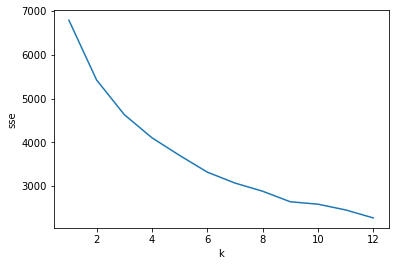

In [54]:
k_range=range(1,13)
sse=[]
for i in  k_range:
    km=KMeans(n_clusters=i)
    km.fit(movies2[['Action','Adventure', 'Fantasy', 'Science Fiction','Crime','Drama','Thriller','Romance','Family','Horror']])
    sse.append(km.inertia_)
plt.xlabel('k')
plt.ylabel('sse')
plt.plot(k_range,sse)


In [18]:
movies = movies[['movie_id','title','overview','genres','keywords','cast','crew']]

In [19]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [20]:
def convert(text):
    L = []
    for i in literal_eval(text):
        L.append(i['name']) 
    return L 

In [21]:
movies.dropna(inplace=True)

In [22]:
movies['genres'] = movies['genres'].apply(convert)
movies.head() 

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [23]:
movies['keywords'] = movies['keywords'].apply(convert)
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [24]:
""" ast.literal_eval('[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]') """

' ast.literal_eval(\'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]\') '

In [25]:
def convert3(text):
    L = []
    counter = 0
    for i in literal_eval(text):
        if counter < 3:
            L.append(i['name'])
        counter+=1
    return L 

In [26]:
movies['cast'] = movies['cast'].apply(convert)
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman, A...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [27]:
movies['cast'] = movies['cast'].apply(lambda x:x[0:3])

In [28]:
def fetch_director(text):
    L = []
    for i in literal_eval(text):
        if i['job'] == 'Director':
            L.append(i['name'])
    return L 

In [29]:
movies['crew'] = movies['crew'].apply(fetch_director)

In [30]:
#movies['overview'] = movies['overview'].apply(lambda x:x.split())
movies.sample(5)

,movie_id,title,overview,genres,keywords,cast,crew
4563,380733,Fight to the Finish,A young amateur fighter makes an enemy with a ...,"[Romance, Action]","[sport, fighting]","[Jennifer Hale, Evan Hannemann, Tonya Kay]",[Warren Sheppard]
3274,14629,Woman on Top,"Set to the intoxicating rhythms of Brazil, ""Wo...","[Comedy, Drama, Romance]",[woman director],"[Penélope Cruz, Murilo Benicio, Mark Feuerstein]",[Fina Torres]
901,8367,Robin Hood: Prince of Thieves,When the dastardly Sheriff of Nottingham murde...,[Adventure],"[england, crusade, mercifulness, robin hood, f...","[Kevin Costner, Morgan Freeman, Christian Slater]",[Kevin Reynolds]
3934,40247,Please Give,"In New York City, a husband and wife butt head...","[Comedy, Drama]","[suicide, new york, infidelity, cancer, indepe...","[Rebecca Hall, Catherine Keener, Amanda Peet]",[Nicole Holofcener]
2264,8953,Steamboy,After receiving a package from his Grandfather...,"[Animation, Fantasy, Science Fiction]","[england, inventor, ball, boy, industrial revo...","[Anne Suzuki, Masane Tsukayama, Katsuo Nakamura]",[Katsuhiro Ōtomo]


In [31]:
def collapse(L):
    L1 = []
    for i in L:
        L1.append(i.replace(" ",""))
    return L1

In [32]:
movies['cast'] = movies['cast'].apply(collapse)
movies['crew'] = movies['crew'].apply(collapse)
movies['genres'] = movies['genres'].apply(collapse)
movies['keywords'] = movies['keywords'].apply(collapse)

In [33]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]


In [34]:
movies['overview'] = movies['overview'].apply(lambda x:x.split())
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]


In [35]:
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']

In [36]:
new = movies.drop(columns=['overview','genres','keywords','cast','crew'])
new.head()

,movie_id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."


In [37]:
new['tags'] = new['tags'].apply(lambda x: " ".join(x))
new.head()

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [38]:
cv = CountVectorizer(max_features=5000,stop_words='english')
    

In [39]:
vector = cv.fit_transform(new['tags']).toarray()

In [40]:
""" vector.shape """

' vector.shape '

In [41]:
similarity = cosine_similarity(vector)

In [42]:
""" similarity """

' similarity '

In [43]:
""" new[new['title'] == 'The Lego Movie'].index[0] """

" new[new['title'] == 'The Lego Movie'].index[0] "

In [72]:
def recommend(movie):
    index = new[new['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:10]:
        print(new.iloc[i[0]].title)
        
    

In [73]:
recommend('Avatar')      

Titan A.E.
Small Soldiers
Ender's Game
Aliens vs Predator: Requiem
Independence Day
Krull
Lifeforce
Battle: Los Angeles
Falcon Rising


In [46]:
def get_recommended_by_prefrence(tup,str):  
    pref=''
    if tup[0]==1:
        pref+='action '
    if tup[1]==1:
        pref+='adventure '
    if tup[2]==1:
        pref+='romantic '
    if tup[3]==1:
        pref+='horror '
    if tup[4]==1:
        pref+='mystery '
    if tup[5]==1:
        pref+='ScienceFiction '
    if tup[6]==1:
        pref+='comedy '
    pref+=str
    pref_list=[pref]
    pref_list.extend(new['tags'])
    print(pref_list[0])
    pref_vector=cv.fit_transform(pref_list).toarray()
    similar_to_pref=cosine_similarity(pref_vector)
    print(similar_to_pref)
    distances = sorted(list(enumerate(similar_to_pref[0])),reverse=True,key = lambda x: x[1])

    for i in distances[1:10]:
        print(new.iloc[i[0]-1].title)

In [47]:
get_recommended_by_prefrence((1,0,0,0,0,0,1),"suspence thriller")

action comedy suspence thriller
[[1.         0.09759001 0.10206207 ... 0.0860663  0.         0.        ]
 [0.09759001 1.         0.08964215 ... 0.02519763 0.0277885  0.        ]
 [0.10206207 0.08964215 1.         ... 0.02635231 0.         0.        ]
 ...
 [0.0860663  0.02519763 0.02635231 ... 1.         0.07352146 0.04774099]
 [0.         0.0277885  0.         ... 0.07352146 1.         0.05264981]
 [0.         0.         0.         ... 0.04774099 0.05264981 1.        ]]
The Helix... Loaded
Khiladi 786
Duplex
Silver Medalist
Lethal Weapon 4
Crying with Laughter
Gentlemen Broncos
Laws of Attraction
Extreme Movie


In [48]:
""" import pickle


pickle.dump(new, open('new.pkl', 'wb'))
pickle.dump(similarity, open('similarity.pkl', 'wb')) """

" import pickle\n\n\npickle.dump(new, open('new.pkl', 'wb'))\npickle.dump(similarity, open('similarity.pkl', 'wb')) "